In [ ]:
!pip install -U scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error

(25, 4) (25,)
(25, 1) (25,)
(25, 2) (25,)
(25, 3) (25,)
(25, 4) (25,)
(25, 5) (25,)
(25, 6) (25,)
(25, 7) (25,)
(25, 8) (25,)
(25, 9) (25,)
(25, 10) (25,)


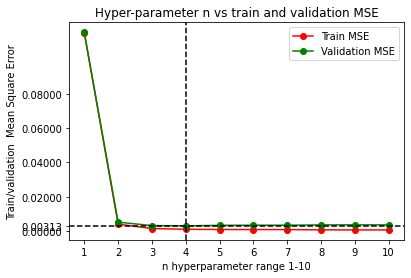

In [ ]:
""" Assignment 3: EN4553 (Machine Vision) """
__author__ = "D.M.Asitha Indrajith Divisekara"
__indexNo__ = "170150A"

# this is the only input to the entire script
Dataset_dir = "170150A/"
##################################################################################################################################

# question 1 - part a
# read the dataset as a set of arrays.

import numpy as np
from typing import Tuple

def load_dataset(src_dir: str) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    
    x_train = np.loadtxt(src_dir + 'x_train.txt')
    y_train = np.loadtxt(src_dir + 'y_train.txt')
    x_val = np.loadtxt(src_dir + 'x_val.txt')
    y_val = np.loadtxt(src_dir + 'y_val.txt')
    x_test = np.loadtxt(src_dir + 'x_test.txt')

    return x_train, y_train, x_val, y_val, x_test
#################################################################################################################################

# n - hyper parameter 
# each w is a weight
# variables x,y represent rows in x_train.txt y_train.txt
# question 1 part b sub part 1
# make input features for the above linear regression model.

def get_features(x: np.ndarray, n: int) -> np.ndarray:
    features = []

    for i in range(1,n+1):
        features.append(np.power(x,i))

    features_nparray = np.array(features)
    features_output = np.transpose(features_nparray)
    return features_output
####################################################################################################################################

# question 1 part b sub part 2
# fit and evaluate function

from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error # this can be achieved using np.mean function

def fit_and_evaluate(x_train:np.ndarray, y_train:np.ndarray, x_val:np.ndarray, y_val:np.ndarray, x_test: np.ndarray, n:int) -> Tuple[float, float]:
# here we also give x_test as an arguement to the function for last part of the assignment we can remove it since other parts does not need this 
    regressor = LinearRegression(fit_intercept = False)
    x_train_features = get_features(x_train, n)
    print(x_train_features.shape, y_train.shape)
    x_val_features = get_features(x_val, n)
    x_test_features = get_features(x_test, n) #only for part d)
    regressor.fit(x_train_features,y_train)
    
    # W = regressor.coef_
    # print('W shape = ', W.shape)
    # W_transpose = np.transpose(W)
    # print('W_transpose shape = ', W_transpose.shape)
    
    y_predict_train = regressor.predict(x_train_features)
    y_predict_val = regressor.predict(x_val_features) 
    y_predict_test = regressor.predict(x_test_features) # only for part d)

    # print(y_predict_test)
    # np.savetxt("170150A_y_predict_test.txt", y_predict_test) # only for part d)
    np.savetxt("170150A_y_predict_test.txt", y_predict_test) # only for part d)

    # we can use numpy mean function to find the Mean Squared Error no need to import sklearn metrics
    train_mse = mean_squared_error(y_train, y_predict_train) 
    # train_mse = np.mean((y_predict_train - y_train)**2)

    val_mse = mean_squared_error(y_val, y_predict_val)
    # val_mse = np.mean((y_predict_val - y_val)**2)
    
    return train_mse, val_mse
    
####################################################################################################################################

import matplotlib.pyplot as plt

# the datasets conaining path can be given wrt the root folder

x_train, y_train, x_val, y_val, x_test = load_dataset(Dataset_dir)

# the following line is only for the part d which is the prediction on test set
fit_and_evaluate(x_train, y_train, x_val, y_val, x_test,4)

# Finding the MSE on training and validation for different n values
train_mse_array = []
val_mse_array = []

for i in range(1,11):
    train_mse,val_mse = train_mse, val_mse = fit_and_evaluate(x_train, y_train, x_val, y_val, x_test,i)
    train_mse_array.append(train_mse)
    val_mse_array.append(val_mse)

# plotting the train and validation squarred errors
plt.plot(range(1,11), train_mse_array, "o-", color="red", label="Train MSE")
plt.plot(range(1,11), val_mse_array, "o-", color="green", label="Validation MSE")
plt.axhline(y = min(val_mse_array), color = 'black', linestyle = 'dashed')
plt.axvline(x = 1+val_mse_array.index(min(val_mse_array)), color = 'black', linestyle = 'dashed')

plt.xticks(range(1,11))
plt.yticks(list(np.linspace(0,0.08,5)) + [min(val_mse_array)])
plt.legend()
plt.xlabel('n hyperparameter range 1-10')
plt.ylabel('Train/validation  Mean Square Error')
plt.title('Hyper-parameter n vs train and validation MSE')

plt.savefig('170150A_Train_and_validation_MSE_for_n=1_to_10.png')
plt.show()

###################################################################################################################################
# end
# answer for the part d is inside the fit_and_evaluation function itself only few changes were done to take the required file 





In [ ]:
x = get_features(np.array([1.0,2.0,3.0]),3)
x

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.]])

In [ ]:
x1 = get_features(np.array([1.0,2.0,3.0]),4)
x1

array([[ 1.,  1.,  1.,  1.],
       [ 2.,  4.,  8., 16.],
       [ 3.,  9., 27., 81.]])

In [ ]:
fit_and_evaluate(x_train, y_train, x_val, y_val, x_test,4)

(25, 4) (25,)


(0.0011650003596661712, 0.0031270553819742627)